In [2]:
import pandas as pd
import pm4py

import matplotlib.pyplot as plt

In [3]:
"""
Plot the conformance checking graph by comparing a generated simulation event log with a bpmn file

Variables
---------
file_path: str, optional
    the file path of the generated simulation event log
    default: event_log.txt, only accepy .txt file
bpmn_loc: str, optional
    the location of the original bpmn model used for simulation
    default: resources/bpmn.bpmn

"""
def plot_conformance_graph(file_path:str = "event_log.txt", bpmn_loc:str = "resources/bpmn.bpmn"):
    #Get file name
    if file_path[-4:] != ".txt":
        raise Exception("The given file path type is not-valid (Only accept .txt file)")
    else:
        file_name = file_path[:-4]
    
    new_file_path = file_name+".csv"
    #File type transformation
    read_file = pd.read_csv(file_path,sep='\t')
    read_file.to_csv(new_file_path, index=None, sep=';')
    
    dataframe = pd.read_csv(new_file_path, sep=';')
    dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')
    
    bpmn = pm4py.read_bpmn(bpmn_loc)
    net, im, fm = pm4py.convert_to_petri_net(bpmn)
    pm4py.view_petri_net(net, im, fm)
    trace = pm4py.conformance_diagnostics_token_based_replay(dataframe, net, im, fm)
    
    #Ploting using matplotlib
    data_no_list = list(range(len(trace)+1))
    actual_list = list()
    actual_list.append(0)
    for traces in trace:
        trace_fitness = traces['trace_fitness'] * 100
        actual_list.append(trace_fitness)
    plt.plot(data_no_list, actual_list)
    plt.xlabel("Number of Simulation(s)")
    plt.ylabel("Conformance fitness")

C:\Users\Arthur Siu\AppData\Local\Temp\ipykernel_18380\2037600673.py:27: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(dataframe, case_id='LogID', activity_key='Event', timestamp_key='Time')


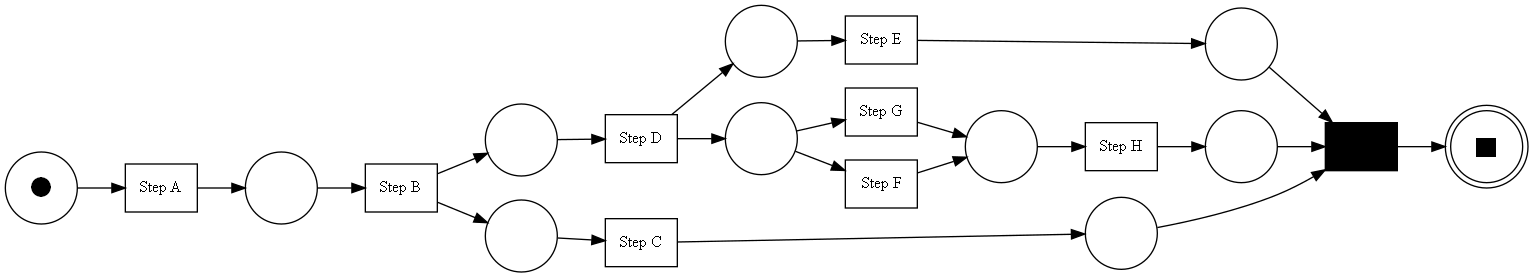

replaying log with TBR, completed variants ::   0%|          | 0/8 [00:00<?, ?it/s]

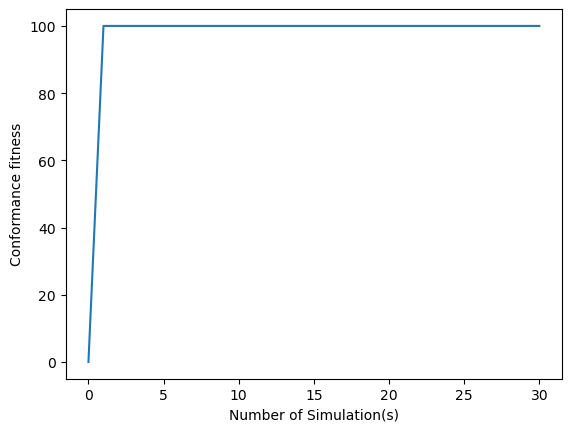

In [4]:
plot_conformance_graph("event_log.txt")